# AegisCovenant Data Analytics Assignment

## Overview: Research and draft a Insurance KPI Report on two-wheelers in India

In [5]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [6]:
# Read the CSV file
dataset = pd.read_csv('test.csv')

In [7]:
dataset.head()

,Gender,Age,Driving_License,Region_Code,Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,reinsured
0,Male,25,1,11,1,< 1 Year,No,35786,152,53,0
1,Male,40,1,28,0,1-2 Year,Yes,33762,7,111,1
2,Male,47,1,28,0,1-2 Year,Yes,40050,124,199,0
3,Male,24,1,27,1,< 1 Year,Yes,37356,152,187,0
4,Male,27,1,28,1,< 1 Year,No,59097,152,297,0


In [8]:
print(dataset.shape)

(127037, 11)


In [9]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

## No missing values in the dataset
# 


In [10]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O'] ## o means other than numerical datatype

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  8


,Age,Driving_License,Region_Code,Insured,Annual_Premium,Policy_Sales_Channel,Vintage,reinsured
0,25,1,11,1,35786,152,53,0
1,40,1,28,0,33762,7,111,1
2,47,1,28,0,40050,124,199,0
3,24,1,27,1,37356,152,187,0
4,27,1,28,1,59097,152,297,0


In [11]:
for column in dataset.columns:
    unique_values = dataset[column].unique()
    print(f"Unique values in column {column}:\n{unique_values}\n")


Unique values in column Gender:
['Male' 'Female']

Unique values in column Age:
[25 40 47 24 27 22 51 42 37 64 23 55 41 26 28 21 58 44 70 71 45 46 49 38
 35 20 30 54 61 53 50 59 62 29 36 33 65 39 32 52 60 57 67 43 69 74 56 31
 76 66 48 63 68 34 77 73 78 72 80 79 75 82 81 84 83 85]

Unique values in column Driving_License:
[1 0]

Unique values in column Region_Code:
[11 28 27 30 37 41 12  7 46  3 48 24 10 15  6 45  8 35 33 50 40 36 21 23
 16 39 29  2 47 18  4 14 31 32 44 17  5 20  1 13 25 43 22  0 38 49 19 26
  9 51 42 52 34]

Unique values in column Insured:
[1 0]

Unique values in column Vehicle_Age:
['< 1 Year' '1-2 Year' '> 2 Years']

Unique values in column Vehicle_Damage:
['No' 'Yes']

Unique values in column Annual_Premium:
[35786 33762 40050 ... 52304 32918 62875]

Unique values in column Policy_Sales_Channel:
[152   7 124  26 160  24  13 122 156 151 154  74 157 158 155   1  60  16
  61  25  12  11  31 163   4  52   9   3  23  59  30  29  15   8 136 145
  14 120  18 125  10  55 

## Analysis

In [12]:
# total number of insured two wheelers
insured_vehichles = 0
for i in range(0,len(dataset['Insured'])):
    if dataset['Insured'][i] == 1:
        insured_vehichles +=1
print("total number of insured two wheelers:",insured_vehichles)

total number of insured two wheelers: 58442


In [13]:
# Policy Retention Rate
r = 0
for i in range(0,len(dataset['reinsured'])):
    if dataset['reinsured'][i] == 1:
        r +=1
print("percentage of people who reinsured:", (r*100/len(dataset['reinsured'])))

percentage of people who reinsured: 90.30518667789698


In [14]:
total_vehichles = len(dataset['Insured'])

In [15]:
percentage_insured = insured_vehichles/total_vehichles*100
print("total number of insured two wheelers:",percentage_insured)

total number of insured two wheelers: 46.00392011776096


In [16]:
# average age of insured people
age = []
for i in range(0,len(dataset['Insured'])):
    if dataset['Insured'][i] == 1:
        age.append(dataset['Age'][i])
print("average age of insured people:",sum(age)/len(age))

average age of insured people: 34.43828068854591


In [17]:
# policy sales channels reach
sales = dataset['Policy_Sales_Channel'].value_counts()
print("Policy_Sales_Channels reach:\n",sales)

Policy_Sales_Channels reach:
 152    44739
26     26894
124    24304
160     7311
156     3652
       ...  
6          1
69         1
141        1
33         1
58         1
Name: Policy_Sales_Channel, Length: 145, dtype: int64


### Channel number 152, 26, 124 reached the maximum people

In [14]:
# Percentage of Individuals with a Driving License
dl = 0
for i in range(0,len(dataset['Driving_License'])):
    if dataset['Driving_License'][i] == 1:
        dl +=1
print("Percentage of Individuals with a Driving License:",dl/len(dataset['Driving_License'])*100)

Percentage of Individuals with a Driving License: 99.78693759528115


In [15]:
# Percentage of Individuals with a Driving License and are insured
a = 0
for i in range(0,len(dataset['Driving_License'])):
    if dataset['Driving_License'][i] == 1 and dataset['Insured'][i] == 1:
        a +=1
print("Percentage of Individuals with a Driving License and are insured:",a/len(dataset['Driving_License'])*100)

Percentage of Individuals with a Driving License and are insured: 45.75777533461556


In [16]:
# Regional Distribution 

region_distribution = dataset['Region_Code'].value_counts()
print("Regional Distribution:",region_distribution)


Regional Distribution: 28    106415
8      33877
46     19749
41     18263
15     13308
30     12191
29     11065
50     10243
3       9251
11      9232
36      8797
33      7654
47      7436
35      6942
6       6280
45      5605
37      5501
18      5153
48      4681
14      4678
39      4644
10      4374
21      4266
2       4038
13      4036
7       3279
12      3198
9       3101
27      2823
32      2787
43      2639
17      2617
26      2587
25      2503
24      2415
38      2026
0       2021
16      2007
31      1960
23      1960
20      1935
49      1832
4       1801
34      1664
19      1535
22      1309
40      1295
5       1279
1       1008
44       808
42       591
52       267
51       183
Name: Region_Code, dtype: int64


### Region with code 28, 8, 46, 41, 15,30 ,29 ,50 has the maximum number of vehicles

In [17]:
# Initialize an empty dictionary to store the regional distribution
region_distribution = {}

# Iterate over the dataset
for i in range(len(dataset['Insured'])):
    if dataset['Insured'][i] == 1:
        region_code = dataset['Region_Code'][i]
        if region_code in region_distribution:
            region_distribution[region_code] += 1
        else:
            region_distribution[region_code] = 1

# Print the regional distribution
print("Regional Distribution:")
for region, count in region_distribution.items():
    print(f"Region Code: {region}, Count: {count}")


Regional Distribution:
Region Code: 11, Count: 5718
Region Code: 41, Count: 10313
Region Code: 3, Count: 4521
Region Code: 6, Count: 4355
Region Code: 50, Count: 5614
Region Code: 15, Count: 6271
Region Code: 28, Count: 33182
Region Code: 35, Count: 3820
Region Code: 8, Count: 17107
Region Code: 30, Count: 8220
Region Code: 36, Count: 4249
Region Code: 26, Count: 1064
Region Code: 19, Count: 544
Region Code: 39, Count: 1812
Region Code: 33, Count: 4282
Region Code: 37, Count: 2380
Region Code: 7, Count: 1346
Region Code: 46, Count: 10293
Region Code: 27, Count: 1131
Region Code: 29, Count: 6568
Region Code: 49, Count: 722
Region Code: 22, Count: 662
Region Code: 25, Count: 1432
Region Code: 0, Count: 617
Region Code: 16, Count: 1038
Region Code: 31, Count: 751
Region Code: 12, Count: 1744
Region Code: 13, Count: 1956
Region Code: 21, Count: 2890
Region Code: 14, Count: 2852
Region Code: 10, Count: 2844
Region Code: 47, Count: 3116
Region Code: 5, Count: 475
Region Code: 18, Count: 2800

### Region with code 28, 8, 46, 41 has the maximum number of insured vehicles

In [18]:
vehicle_age_distribution = {}

for vehicle_age in dataset['Vehicle_Age'].unique():
    vehicle_age_distribution[vehicle_age] = 0

for i in range(len(dataset['Vehicle_Age'])):
    if dataset['Insured'][i] == 1:
        vehicle_age = dataset['Vehicle_Age'][i]
        vehicle_age_distribution[vehicle_age] += 1

print("Vehicle Age Distribution:")
for vehicle_age, count in vehicle_age_distribution.items():
    print(f"Vehicle Age: {vehicle_age}, Count: {count}")


Vehicle Age Distribution:
Vehicle Age: > 2 Years, Count: 46
Vehicle Age: 1-2 Year, Count: 65325
Vehicle Age: < 1 Year, Count: 109257


In [24]:
damaged_vehichles_claim = 0
for i in range(0,len(dataset['Vehicle_Damage'])):
    if dataset['Vehicle_Damage'][i] == 'Yes':
        damaged_vehichles_claim +=1
print("damaged_vehichles_claims percentage:",damaged_vehichles_claim/len(dataset['Vehicle_Damage'])*100)

damaged_vehichles_claims percentage: 50.48765576252463


In [25]:
# Average Annual Premium
print("Average Annual Premium:")
sum(dataset['Annual_Premium'])/len(dataset['Annual_Premium'])

Average Annual Premium:


30524.643576280927

In [33]:
gender_distribution = {}

for gender in dataset['Gender'].unique():
    gender_distribution[gender] = 0

for i in range(len(dataset['Gender'])):
    if dataset['Insured'][i] == 1:
        gender = dataset['Gender'][i]
        gender_distribution[gender] += 1

print("Gender Distribution:")
for gender, count in gender_distribution.items():
    print(f"Gender: {gender}, Count: {count}")


Gender Distribution:
Gender: Male, Count: 86679
Gender: Female, Count: 87949


In [35]:
male_premium = dataset.loc[dataset['Gender'] == 'Male', 'Annual_Premium'].mean()
female_premium = dataset.loc[dataset['Gender'] == 'Female', 'Annual_Premium'].mean()

print("Average Annual Premium of males:", male_premium)
print("Average Annual Premium of females:", female_premium)


Average Annual Premium of males: 30622.649122466508
Average Annual Premium of females: 30495.787989944005


## graphs and charts

174628


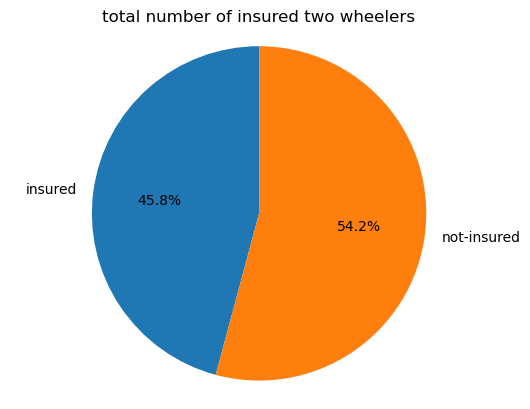

In [38]:
# total number of insured two wheelers
labels = ['insured', 'not-insured']
sizes = [insured_vehichles,total_vehichles-insured_vehichles]  # Example data, adjust with your actual values

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Aspect ratio of the pie chart (equal means it will be a circle)
plt.axis('equal')

# Adding a title
plt.title('total number of insured two wheelers')

# Display the chart
plt.show()


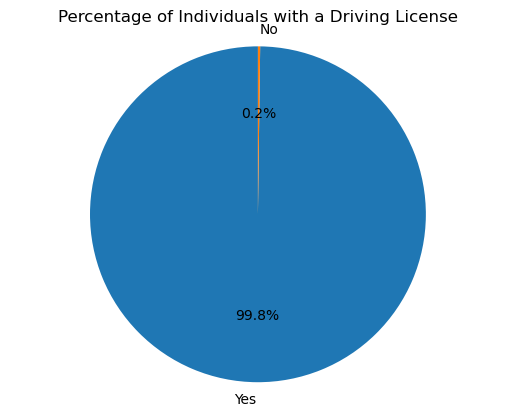

In [39]:
# Percentage of Individuals with a Driving License
labels = ['Yes', 'No']
sizes = [dl,len(dataset['Driving_License'])-dl]  # Example data, adjust with your actual values

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Aspect ratio of the pie chart (equal means it will be a circle)
plt.axis('equal')

# Adding a title
plt.title('Percentage of Individuals with a Driving License')

# Display the chart
plt.show()


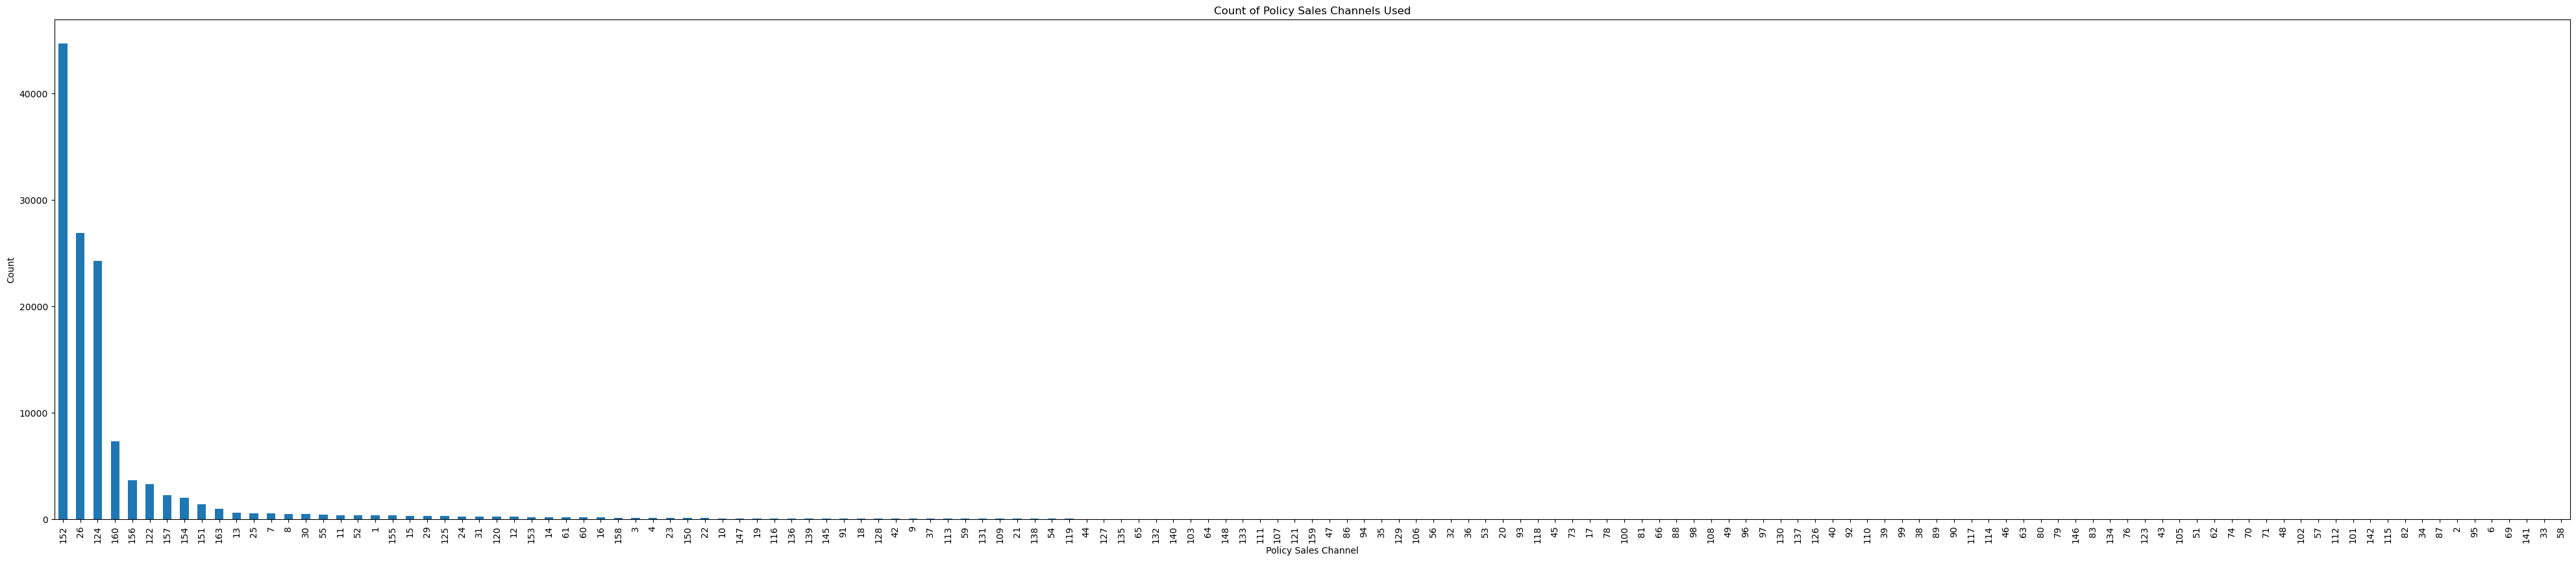

In [125]:
# policy sales channels reach

sales = dataset['Policy_Sales_Channel'].value_counts()


plt.figure(figsize=(50, 10))
sales.plot(kind='bar')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Count')
plt.title('Count of Policy Sales Channels Used')
plt.show()


### Channel 152, 26, 124 reached maximum people.

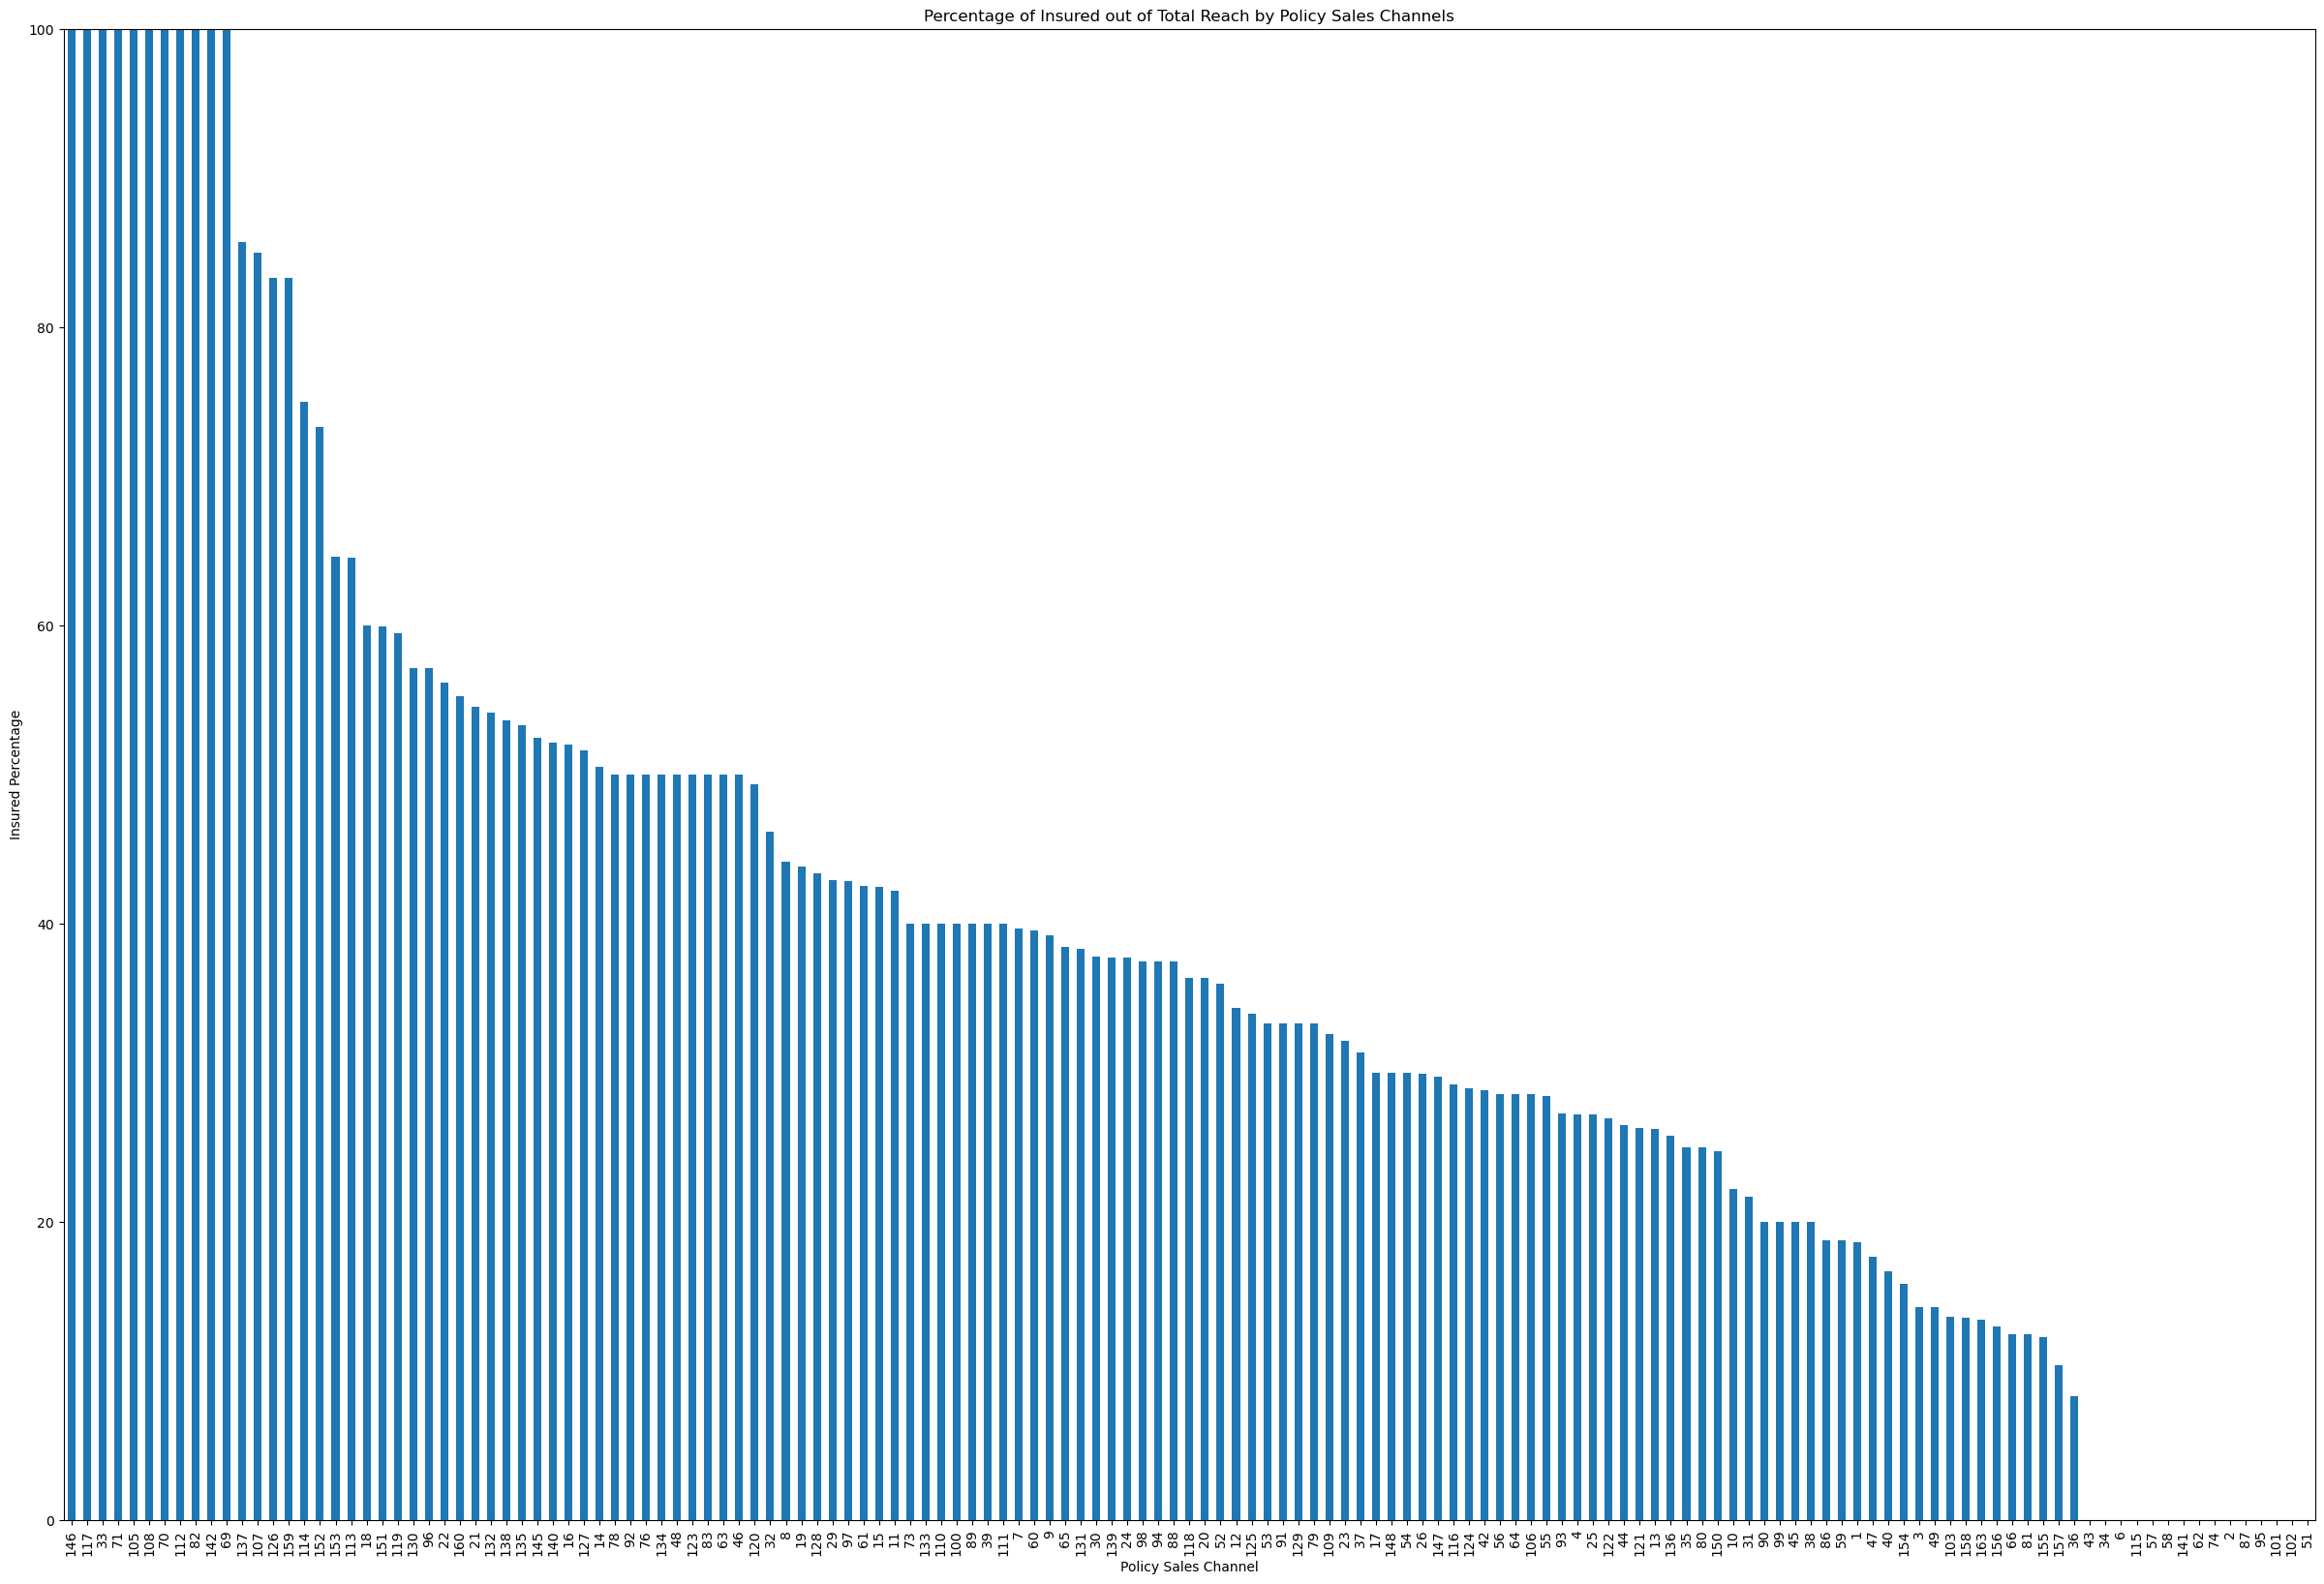

In [136]:
# Group the data by Policy_Sales_Channel and calculate the count of Insured and total count
channel_data = dataset.groupby('Policy_Sales_Channel')['Insured'].agg(['sum', 'count'])
channel_data = channel_data.rename(columns={'sum': 'Insured', 'count': 'Total_Reach'})

channel_data['Insured_Percentage'] = (channel_data['Insured'] / channel_data['Total_Reach']) * 100

channel_data = channel_data.sort_values(by='Insured_Percentage', ascending=False)

plt.figure(figsize=(30, 20))
channel_data['Insured_Percentage'].plot(kind='bar')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Insured Percentage')
plt.title('Percentage of Insured out of Total Reach by Policy Sales Channels')
plt.xticks(rotation=90)
plt.ylim(0, 100)  
plt.show()


### Channel 146, 117, 33, 71 could convence most of the customers to take insurance

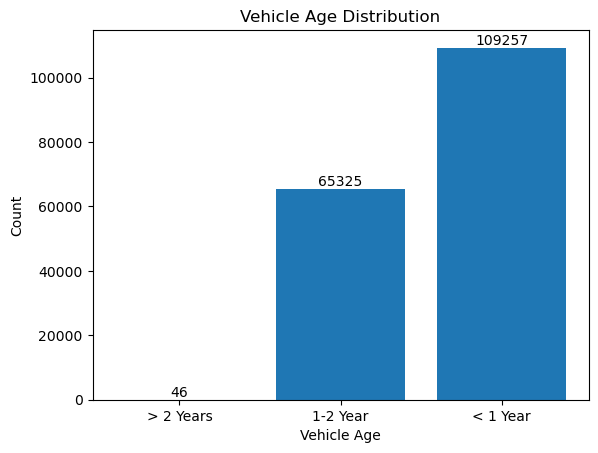

In [46]:
import matplotlib.pyplot as plt

vehicle_age_distribution = {}

for vehicle_age in dataset['Vehicle_Age'].unique():
    vehicle_age_distribution[vehicle_age] = 0

for i in range(len(dataset['Vehicle_Age'])):
    if dataset['Insured'][i] == 1:
        vehicle_age = dataset['Vehicle_Age'][i]
        vehicle_age_distribution[vehicle_age] += 1

vehicle_ages = list(vehicle_age_distribution.keys())
counts = list(vehicle_age_distribution.values())

plt.bar(vehicle_ages, counts)
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Vehicle Age Distribution')

for i in range(len(vehicle_ages)):
    plt.text(vehicle_ages[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()


### most vehicles have age 0-2 years

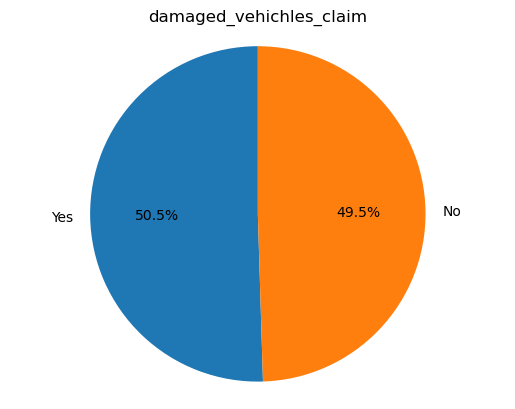

In [48]:
# damaged_vehichles_claim

labels = ['Yes', 'No']
sizes = [damaged_vehichles_claim,len(dataset['Driving_License'])-damaged_vehichles_claim] 

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.axis('equal')

plt.title('damaged_vehichles_claim')

plt.show()


### 50.5 percent customers claimed the damage.

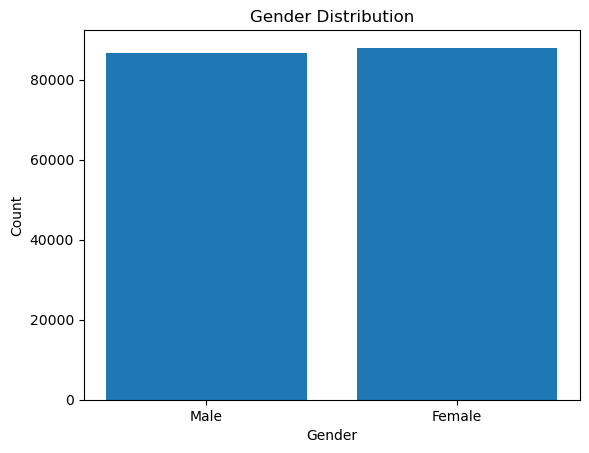

In [50]:
import matplotlib.pyplot as plt

gender_distribution = {}

for gender in dataset['Gender'].unique():
    gender_distribution[gender] = 0

for i in range(len(dataset['Gender'])):
    if dataset['Insured'][i] == 1:
        gender = dataset['Gender'][i]
        gender_distribution[gender] += 1

genders = list(gender_distribution.keys())
counts = list(gender_distribution.values())

plt.bar(genders, counts)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


([<matplotlib.patches.Wedge at 0x1eafcb83df0>,
 [Text(-0.35986140733521094, -1.144770617857884, 'Reinsured'),
  Text(0.32987298128629244, 1.049373058648493, 'Not Reinsured')],
 [Text(-0.20991915427887303, -0.6677828604170989, '90.3%'),
  Text(0.1799307170652504, 0.5723853047173597, '9.7%')])

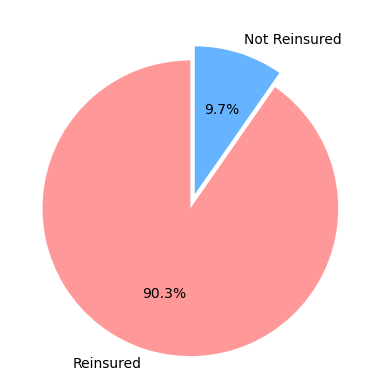

In [126]:
# Policy Retention Rate
reinsured_count = dataset['reinsured'].sum()
total_count = len(dataset['reinsured'])
percentage = (reinsured_count / total_count) * 100

labels = ['Reinsured', 'Not Reinsured']
sizes = [percentage, 100 - percentage]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)


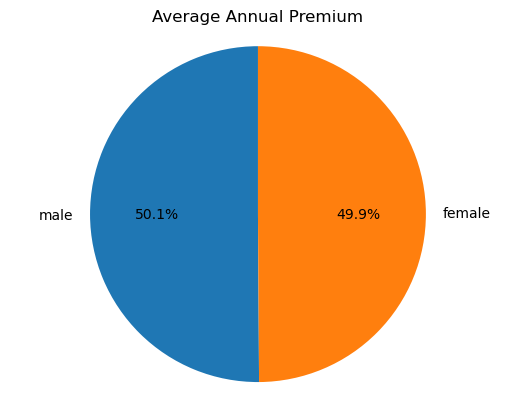

In [52]:
male_premium

labels = ['male', 'female']
sizes = [male_premium, female_premium]  

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.axis('equal')

plt.title('Average Annual Premium')

plt.show()

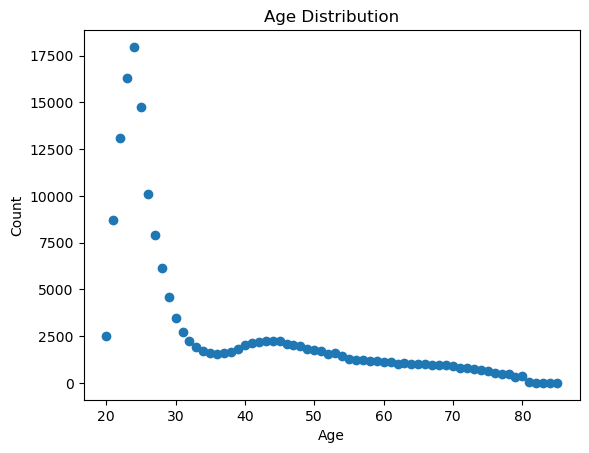

In [61]:
import matplotlib.pyplot as plt

age_distribution = {}

for age in dataset['Age'].unique():
    age_distribution[age] = 0

for i in range(len(dataset['Age'])):
    if dataset['Insured'][i] == 1:
        age = dataset['Age'][i]
        age_distribution[age] += 1

ages = list(age_distribution.keys())
counts = list(age_distribution.values())

plt.scatter(ages, counts)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


<IPython.core.display.Javascript object>

C:\Users\priya\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


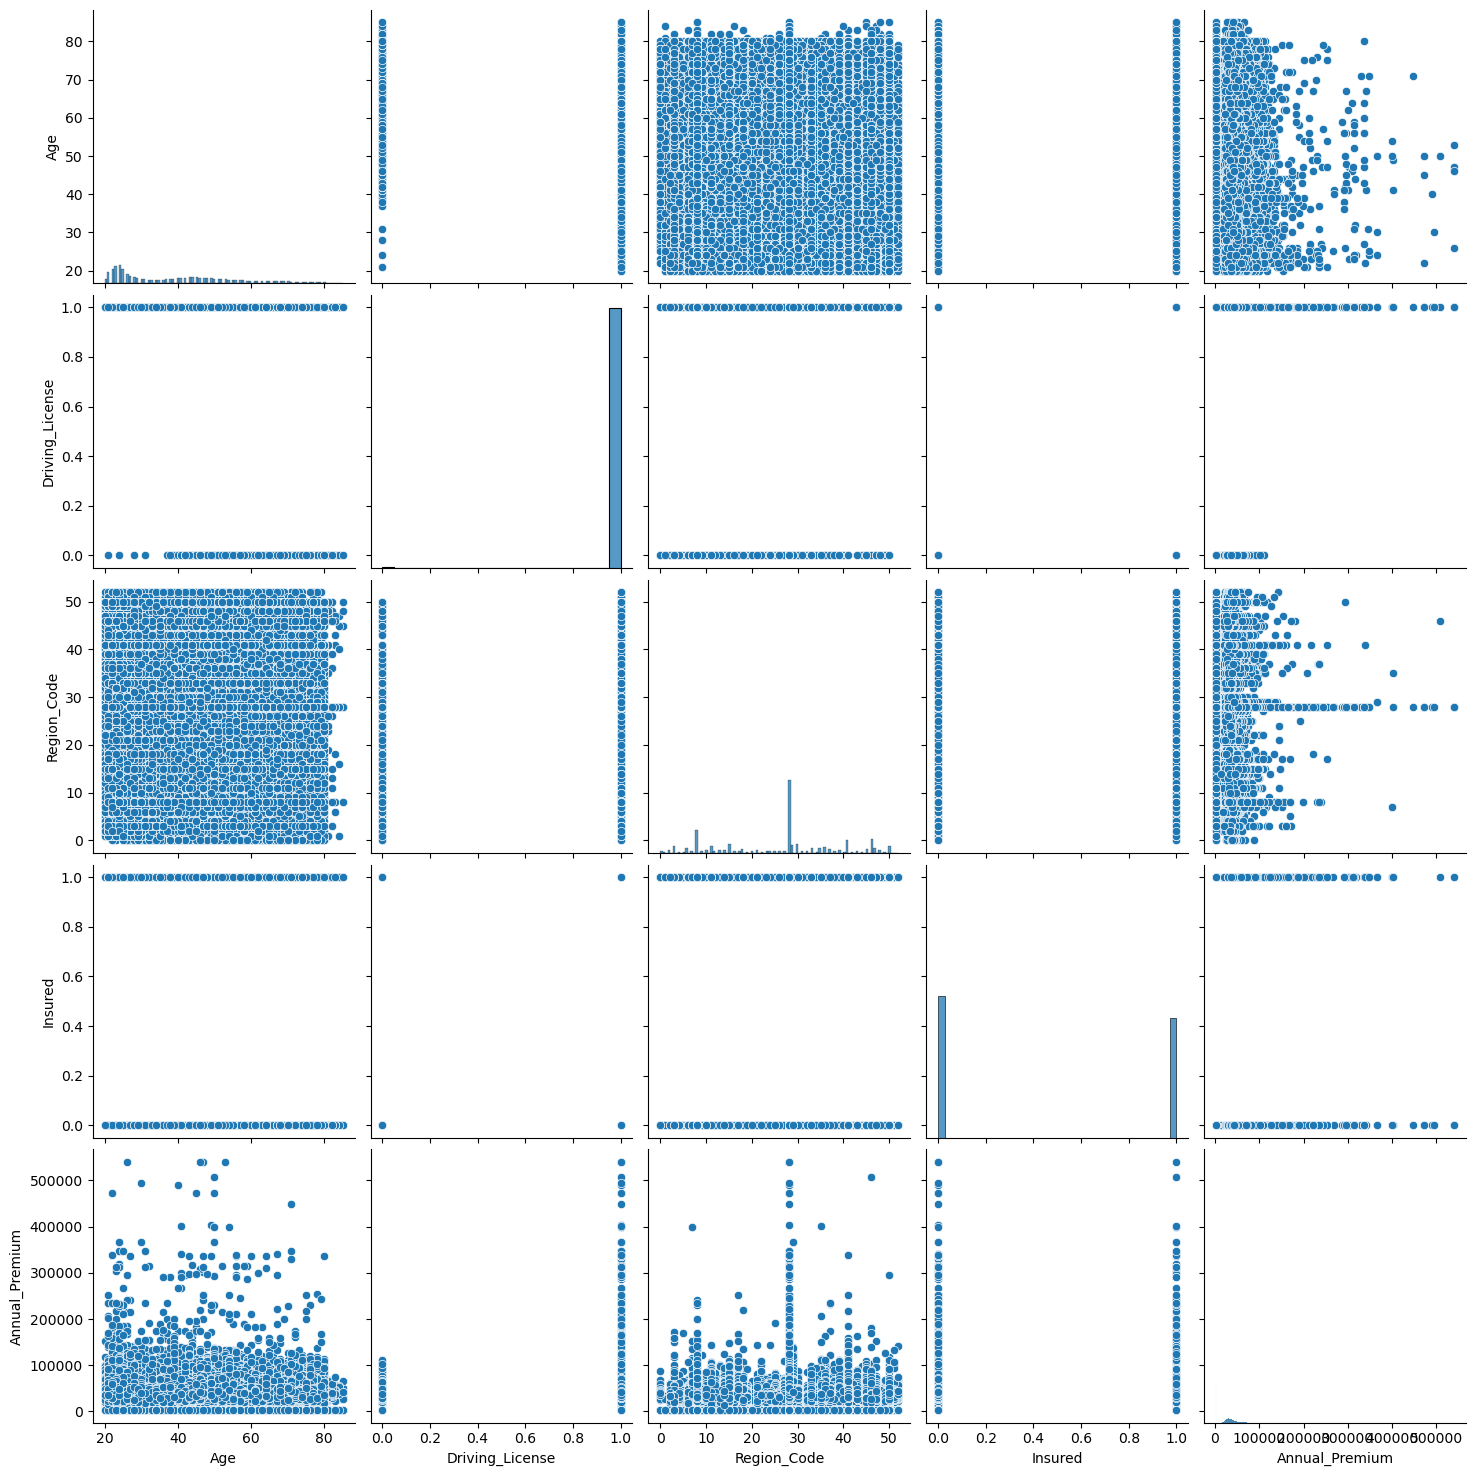

In [54]:
sns.pairplot(dataset,size=3)

<IPython.core.display.Javascript object>

C:\Users\priya\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


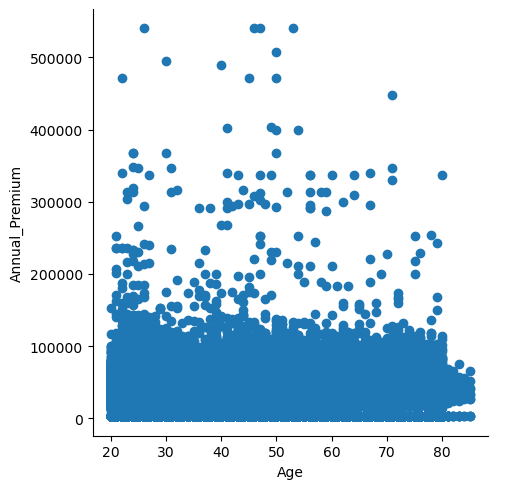

In [66]:
sns.FacetGrid(dataset,size=5).map(plt.scatter,"Age","Annual_Premium").add_legend();
plt.show()

<IPython.core.display.Javascript object>

C:\Users\priya\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


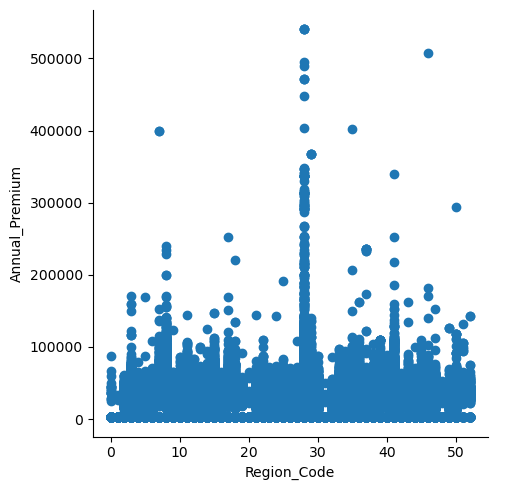

In [67]:
sns.FacetGrid(dataset,size=5).map(plt.scatter,"Region_Code","Annual_Premium").add_legend();
plt.show()

<IPython.core.display.Javascript object>

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insured', ylabel='count'>

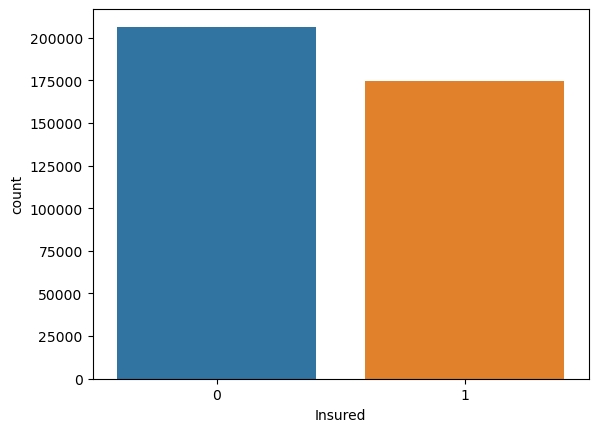

In [69]:
sns.countplot("Insured", data = dataset)

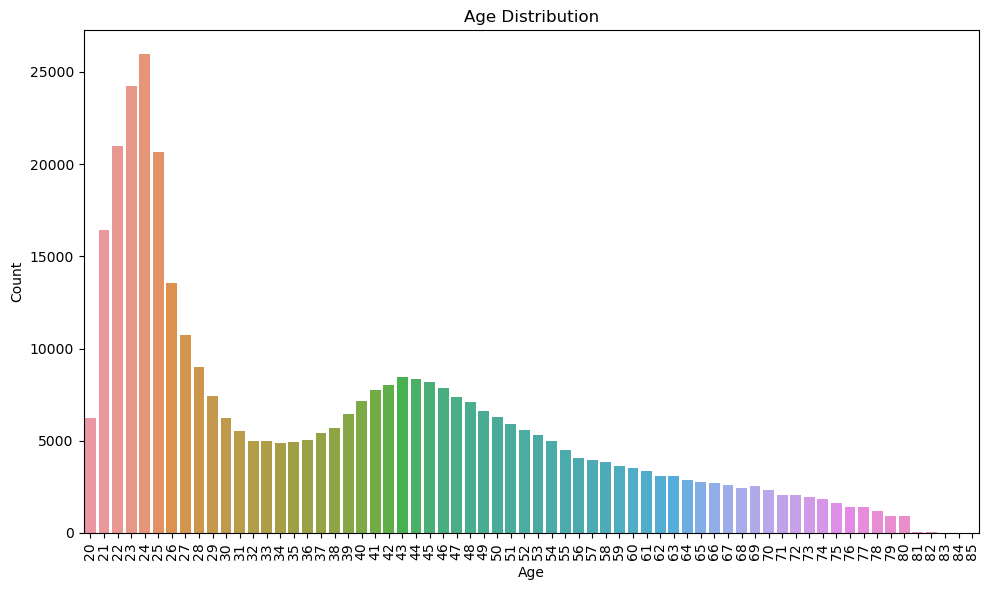

In [76]:
plt.figure(figsize=(10, 6))  

sns.countplot(x="Age", data=dataset)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

plt.xticks(rotation=90)

plt.tight_layout() 

plt.show()


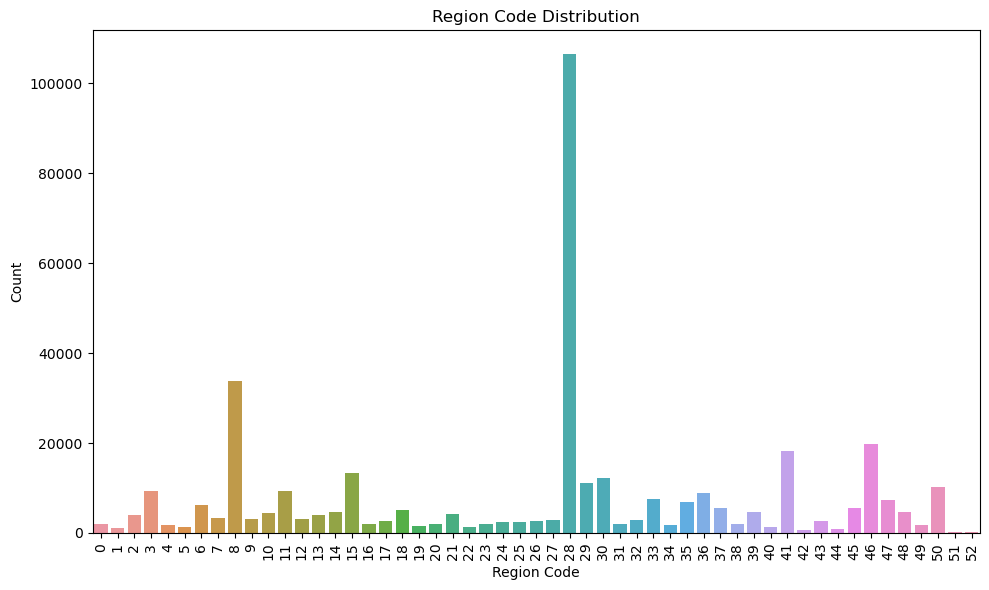

In [75]:
plt.figure(figsize=(10, 6))  

sns.countplot(x="Region_Code", data=dataset)
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.title('Region Code Distribution')

plt.xticks(rotation=90)  

plt.tight_layout() 

plt.show()


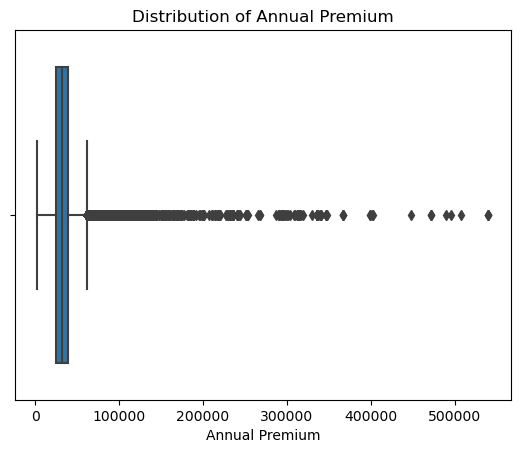

In [83]:
sns.boxplot(x=dataset['Annual_Premium'])
plt.xlabel('Annual Premium')
plt.title('Distribution of Annual Premium')

plt.show()


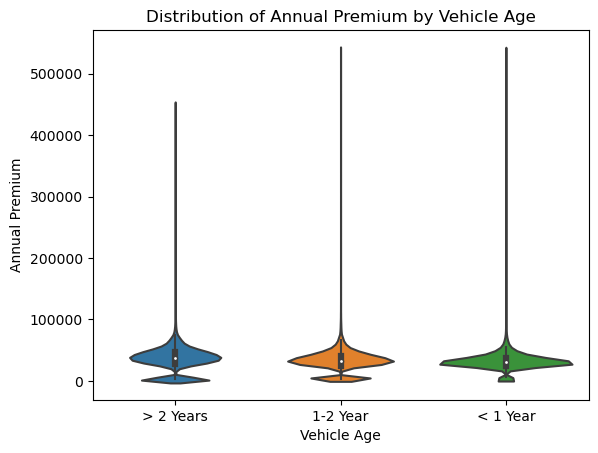

In [85]:
sns.violinplot(x='Vehicle_Age', y='Annual_Premium', data=dataset)
plt.xlabel('Vehicle Age')
plt.ylabel('Annual Premium')
plt.title('Distribution of Annual Premium by Vehicle Age')

plt.show()


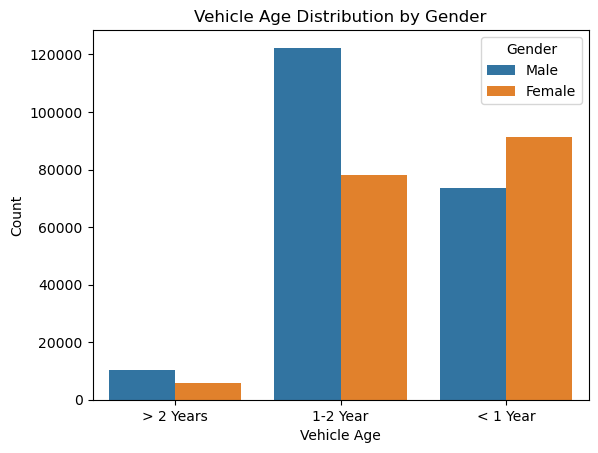

In [89]:
sns.countplot(x='Vehicle_Age', hue='Gender', data=dataset)
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Vehicle Age Distribution by Gender')
plt.show()